# RBF Networks and Prototypical Learning

## Introduction

- We have learned how neural networks transform data into new representation to solve non-lienar problems.
- We will not look at non-linear classification from the perspective of function approximation.
- Key idea:
    - Transform data in terms of a preselected class of interpolation functions.
- We will also see how RBF networks relate to the field of prototypical learning.

## Function approximation

- Recall the XOR example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR problem: four blobs at (0,0), (0,1), (1,0), (1,1)
np.random.seed(42)
n_samples = 50
std = 0.15

centers = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 1, 1, 0])  # XOR labels

X = []
y = []
for center, label in zip(centers, labels):
    X.append(center + std * np.random.randn(n_samples, 2))
    y.append(np.full(n_samples, label))
X = np.vstack(X)
y = np.concatenate(y)


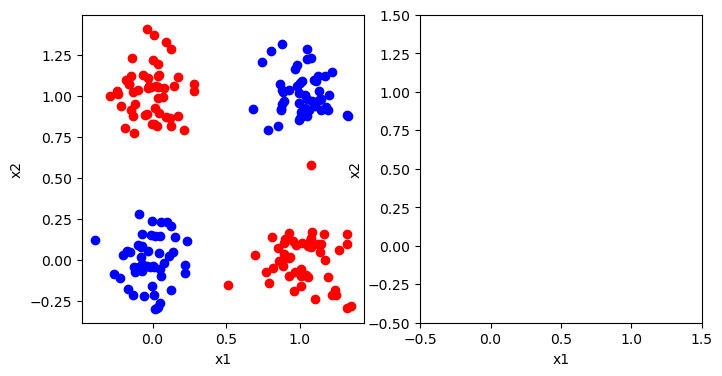

In [2]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.subplot(122)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### General idea

- Let (non-linear) $f_i: \mathbb{R}^d \rightarrow \mathbb{R}, i=1,\cdots,k$
- Look at $\mathbf{x} \in \mathbb{R}^d$. (Usually $k>l$)
- Draw example:

### Network

- The function approximation setup described above can be thought of as a network:

## Radial basis function (RBF) networks

- General idea: $$ f(\|\mathbf{x} - \mathbf{c}_i\|)$$
- RBF network: $$ f(\mathbf{x})= \exp(-\frac{1}{2\sigma_i^2}(\|\mathbf{x} - \mathbf{c}_i\|))$$
- Activation at node $f_i$ given by distance to $\mathbf{c}_i$.

### Estimating the weights

- Any linear method will do!
- Let $\mathbf{y}$ be the desired outputs. Construct matrix $\mathbf{G}$:
- $$ G = \begin{bmatrix} \phi(x_1, c_1) & \cdots & \phi(x_1, c_k) \\ \vdots & & \vdots \\ \phi(x_N, c_1) & \cdots & \phi(x_N, c_k) \end{bmatrix}_{N \times k} $$
- So: 
- $$ \mathbf{g} = G \mathbf{w} = \begin{bmatrix} g(x_1) \\ \vdots \\ g(x_N) \end{bmatrix} $$

### Estimating the weights

- Choose $\mathbf{w}$ such that $J = \|\mathbf{y} - G\mathbf{w}\|^2$ is minimized.
- $$ \frac{\partial J}{\partial \mathbf{w}} = 0 \implies \boxed{\mathbf{w} = (G^\top G)^{-1} G^\top \mathbf{y}} $$


### How to choose the centers?

- **Fixed centres:** Centres selected randomly from the training set.  
   - Simple, but not optimum!
- **Training of the centres:**  Let $\sigma_i^2$, $\mathbf{c}_i$, $w_i$, $i=1,\ldots,k$, be free parameters learned from the training set.

   $$
   \frac{\partial J}{\partial \mathbf{c}_i} = 0 \implies \mathbf{c}_i^{(\text{new})} = \mathbf{c}_i^{(\text{old})} + \mu \frac{\partial J}{\partial \mathbf{c}_i}
   $$
- Choose centres according to how the data are distributed in space. Draw ->
   - More about this later.

## Prototypical learning

